# import ข้อมูล

In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression, Lasso
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Desktop/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
หา Missing Values

In [3]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# ดูCorrelationของแต่ละตัวแปร

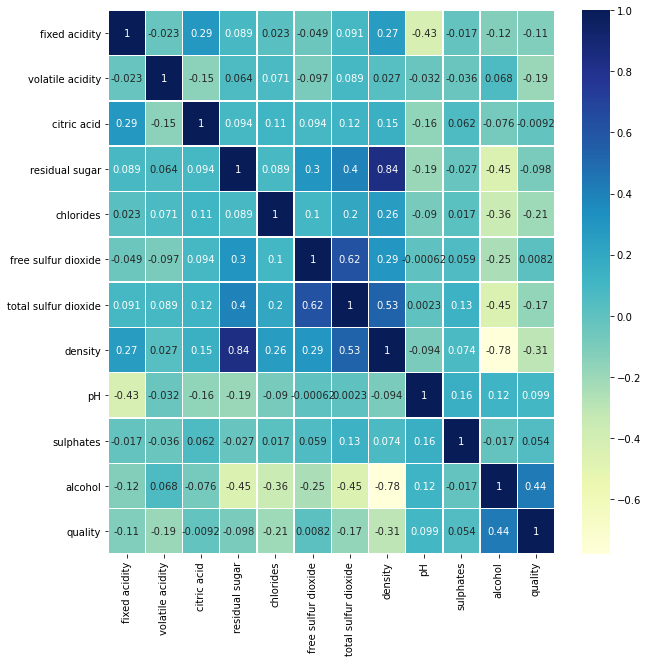

In [4]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="YlGnBu",annot=True,linewidths=.5,ax=ax)

# ตัวแปรต้น
=['fixed acidity' ,'volatile acidity','citric acid ','residual sugar ','chlorides','free sulfur dioxide','total sulfur dioxide','density ','pH','sulphates','alcohol']

ตัวแปรตาม
= ['quality']

In [5]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [50]:
ft=['fixed acidity','volatile acidity','chlorides','total sulfur dioxide','density','alcohol']

In [51]:
Z = df[ft] 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [52]:
regr = LinearRegression()
lasso = Lasso(alpha=0.01)

In [53]:
def coeffecients(model):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    coeffecients = pd.DataFrame(model.coef_,X.columns) 
    coeffecients.columns = ['Coeffecient']
    print(coeffecients)
    print('Mean absolute error: %.2f'% mean_absolute_error(Y_test, Y_pred))
    print('R_squared: %.2f'% r2_score(Y_test, Y_pred))
    print('Root Mean Squared Error: %.2f'%np.sqrt(mean_squared_error(Y_test, Y_pred)))

#function การหาต่าcoeffecntsของโมเดล โดยใช้วิธีการแบ่งข้อลูลแบบCross validation ซึ่งแบ่งข้อมูลออกเป็น5ส่วน

In [54]:
def cross_validation_coeff(model):
    cv_results = cross_validate(model, X, Y, cv=5, return_estimator=True)
    for model in cv_results['estimator']:
        co = pd.DataFrame(model.coef_,X.columns) 
        co.columns = ['Coeffecient']
        print(co)

In [55]:
def cross_validation_coeff_ft(model):
    cv_results = cross_validate(model, Z, Y, cv=5, return_estimator=True)
    for model in cv_results['estimator']:
        co = pd.DataFrame(model.coef_,Z.columns) 
        co.columns = ['Coeffecient']
        print(co)

In [56]:
def cross_validation_score(model):
    val_mae = cross_val_score(model, X, Y, scoring="neg_mean_absolute_error", cv = 5)
    val_mse = cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv = 5)
    val_rmse = np.sqrt(-val_mse)
    val_r2 = cross_val_score(model, X, Y, scoring="r2", cv = 5)
    print("Mean Absolute Error:\t", -val_mae)
    print("mean(Mean Absolute Error):\t",-val_mae.mean())
    print("R_squared:\t",val_r2)
    print("mean(R_squared):\t",val_r2.mean())
    print("Root Mean Squared Error:\t", val_rmse)
    print("mean(Root Mean Squared Error):\t",val_rmse.mean())

In [57]:
def cross_validation_score_ft(model):
    val_mae = cross_val_score(model, Z, Y, scoring="neg_mean_absolute_error", cv = 5)
    val_mse = cross_val_score(model, Z, Y, scoring="neg_mean_squared_error", cv = 5)
    val_rmse = np.sqrt(-val_mse)
    val_r2 = cross_val_score(model, Z, Y, scoring="r2", cv = 5)
    print("Mean Absolute Error:\t", -val_mae)
    print("mean(Mean Absolute Error):\t",-val_mae.mean())
    print("R_squared:\t",val_r2)
    print("mean(R_squared):\t",val_r2.mean())
    print("Root Mean Squared Error:\t", val_rmse)
    print("mean(Root Mean Squared Error):\t",val_rmse.mean())

# ค่าาcoeffecnts และค่า'Mean absolute error','R_squared','Root Mean Squared Error' จากโมเดลLinearRegression โดยแบ่งข้อมูลแบบปกติ

In [21]:
print(coeffecients(regr)) 

                      Coeffecient
fixed acidity            0.045907
volatile acidity        -1.914884
citric acid             -0.061303
residual sugar           0.071240
chlorides               -0.026475
free sulfur dioxide      0.005119
total sulfur dioxide    -0.000242
density               -124.264125
pH                       0.600700
sulphates                0.649073
alcohol                  0.229009
Mean absolute error: 0.59
R_squared: 0.27
Root Mean Squared Error: 0.75
None


# ค่า'Mean absolute error','R_squared','Root Mean Squared Error' จากโมเดลLinearRegression โดยแบ่งข้อมูลแบบCross validation

In [24]:
print(cross_validation_score(regr))

Mean Absolute Error:	 [0.65151403 0.60287265 0.58660583 0.57607985 0.55191584]
mean(Mean Absolute Error):	 0.5937976390149554
R_squared:	 [0.20126776 0.29276052 0.27466003 0.30555263 0.15465158]
mean(R_squared):	 0.24577850482967145
Root Mean Squared Error:	 [0.83465773 0.76938384 0.75734897 0.73700675 0.71255098]
mean(Root Mean Squared Error):	 0.7621896534167796
None


# ค่าาcoeffecntจากการแบ่งข้อมูลแบบCross validation ของโมเดลLinearRegression

In [25]:
print(cross_validation_coeff(regr))

                      Coeffecient
fixed acidity            0.033420
volatile acidity        -1.935458
citric acid              0.055762
residual sugar           0.079969
chlorides                0.005732
free sulfur dioxide      0.003435
total sulfur dioxide    -0.000126
density               -127.531724
pH                       0.419676
sulphates                0.440441
alcohol                  0.236060
                      Coeffecient
fixed acidity            0.056701
volatile acidity        -1.800278
citric acid             -0.096045
residual sugar           0.081910
chlorides               -0.204713
free sulfur dioxide      0.003514
total sulfur dioxide    -0.000578
density               -155.364199
pH                       0.618826
sulphates                0.824387
alcohol                  0.170749
                      Coeffecient
fixed acidity            0.111274
volatile acidity        -1.974691
citric acid              0.032517
residual sugar           0.094684
chlorides     

# ค่าาcoeffecnts และค่า'Mean absolute error','R_squared','Root Mean Squared Error' จากโมเดลLassoRegression โดยแบ่งข้อมูลแบบปกติ

In [26]:
print(coeffecients(lasso)) 

                      Coeffecient
fixed acidity           -0.050802
volatile acidity        -0.979821
citric acid             -0.000000
residual sugar           0.019435
chlorides               -0.000000
free sulfur dioxide      0.007547
total sulfur dioxide    -0.001260
density                 -0.000000
pH                       0.000000
sulphates                0.000000
alcohol                  0.349891
Mean absolute error: 0.60
R_squared: 0.24
Root Mean Squared Error: 0.77
None


# ค่า'Mean absolute error','R_squared','Root Mean Squared Error' จากโมเดลLassoRegression โดยแบ่งข้อมูลแบบCross validation

In [27]:
print(cross_validation_score(lasso))

Mean Absolute Error:	 [0.67253485 0.61826002 0.60496959 0.58711497 0.55537839]
mean(Mean Absolute Error):	 0.6076515643067376
R_squared:	 [0.17290962 0.27049548 0.26298539 0.2905274  0.13305363]
mean(R_squared):	 0.22599430369052326
Root Mean Squared Error:	 [0.84934532 0.78140072 0.76341956 0.74493711 0.72159612]
mean(Root Mean Squared Error):	 0.7721397639433631
None


# ค่าาcoeffecntจากการแบ่งข้อมูลแบบCross validation ของโมเดลLassoRegression

In [63]:
print(cross_validation_coeff(lasso))

                      Coeffecient
fixed acidity           -0.046626
volatile acidity        -0.967994
citric acid              0.000000
residual sugar           0.028099
chlorides               -0.000000
free sulfur dioxide      0.006159
total sulfur dioxide    -0.001474
density                 -0.000000
pH                       0.000000
sulphates                0.000000
alcohol                  0.356460
                      Coeffecient
fixed acidity           -0.045936
volatile acidity        -0.807678
citric acid              0.000000
residual sugar           0.018480
chlorides               -0.000000
free sulfur dioxide      0.006080
total sulfur dioxide    -0.001677
density                 -0.000000
pH                       0.000000
sulphates                0.000000
alcohol                  0.328626
                      Coeffecient
fixed acidity           -0.029796
volatile acidity        -1.035403
citric acid              0.000000
residual sugar           0.023173
chlorides     

# ค่าาcoeffecntจากการแบ่งข้อมูลแบบCross validation ของโมเดลLinearRegression โดยคัดattribute

In [61]:
print(cross_validation_coeff_ft(regr))

                      Coeffecient
fixed acidity           -0.106401
volatile acidity        -2.144889
chlorides               -1.083242
total sulfur dioxide     0.000611
density                 58.868900
alcohol                  0.433691
                      Coeffecient
fixed acidity           -0.096158
volatile acidity        -2.049849
chlorides               -1.377048
total sulfur dioxide     0.000437
density                 39.554555
alcohol                  0.380941
                      Coeffecient
fixed acidity           -0.088712
volatile acidity        -2.167379
chlorides               -1.705929
total sulfur dioxide     0.000397
density                 56.927340
alcohol                  0.409305
                      Coeffecient
fixed acidity           -0.085177
volatile acidity        -2.121389
chlorides               -1.368686
total sulfur dioxide     0.000788
density                 37.040585
alcohol                  0.387580
                      Coeffecient
fixed acidity 

# ค่า'Mean absolute error','R_squared','Root Mean Squared Error' จากโมเดลLinearRegression โดยแบ่งข้อมูลแบบCross validation โดยคัดattribute

In [62]:
print(cross_validation_score_ft(regr)) 

Mean Absolute Error:	 [0.65286182 0.60989799 0.60973185 0.5821307  0.55188028]
mean(Mean Absolute Error):	 0.6013005285688762
R_squared:	 [0.19395486 0.28204062 0.24504828 0.28816019 0.15223356]
mean(R_squared):	 0.2322875029815022
Root Mean Squared Error:	 [0.83846993 0.77519283 0.77265358 0.74617884 0.71356934]
mean(Root Mean Squared Error):	 0.769212906266566
None
